In [ ]:
# !pip install libsvm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from libsvm.svmutil import *
from libsvm import *

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/zoo.csv')
class_name = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/class.csv')

In [ ]:
class_name.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [ ]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
print('Số lượng lớp: ')
df['class_type'].unique()

Số lượng lớp: 


array([1, 4, 2, 7, 6, 5, 3])

In [ ]:
# Các thuộc tính có giá trị đa phần là nhị phân, chỉ có leg là khác biệt
df.legs.unique()

array([4, 0, 2, 6, 8, 5])

In [ ]:
# Có động vật 5 chân?
df[df['legs']==5]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
85,starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


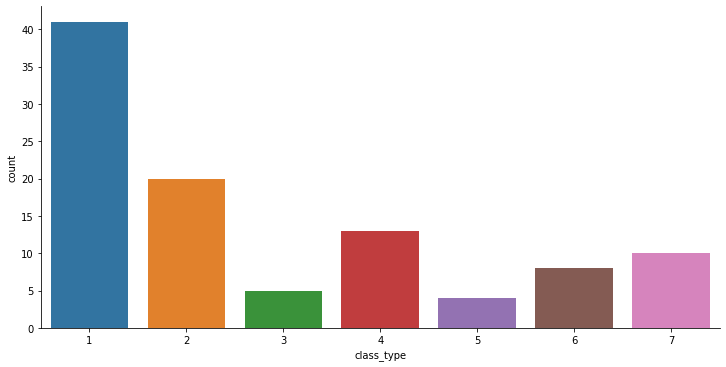

In [ ]:
sns.factorplot('class_type', data=df,kind="count", aspect=2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

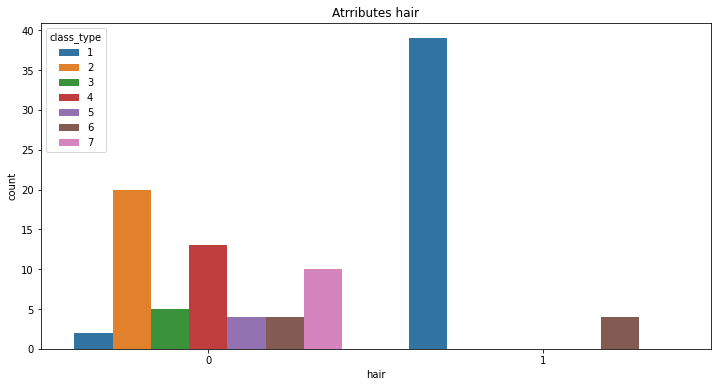

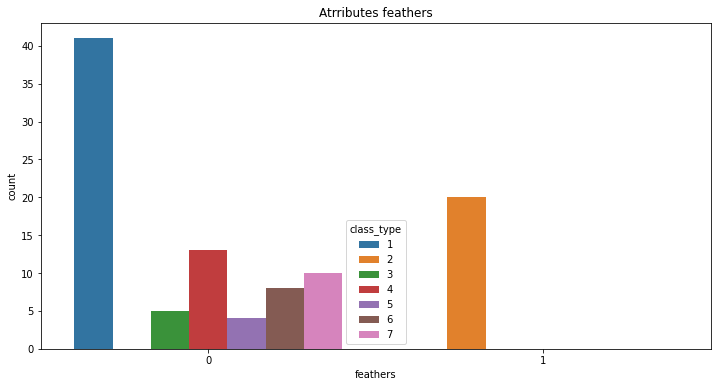

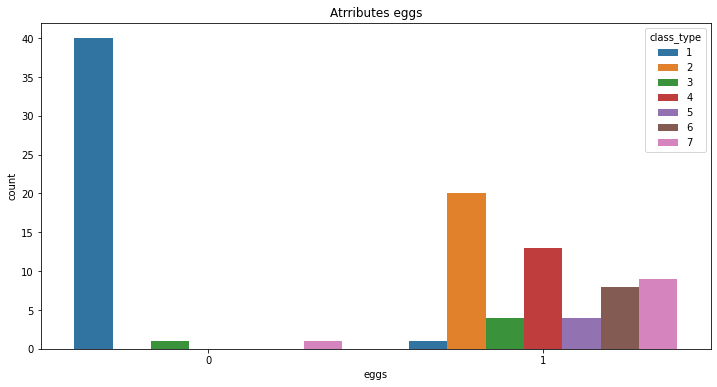

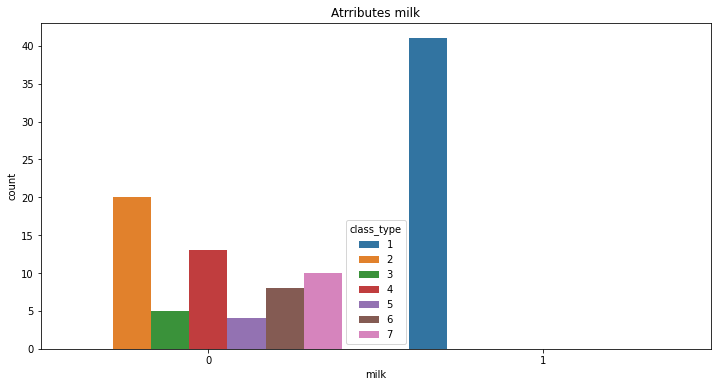

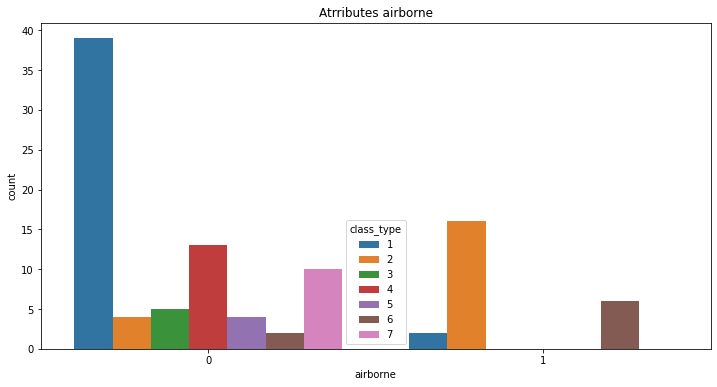

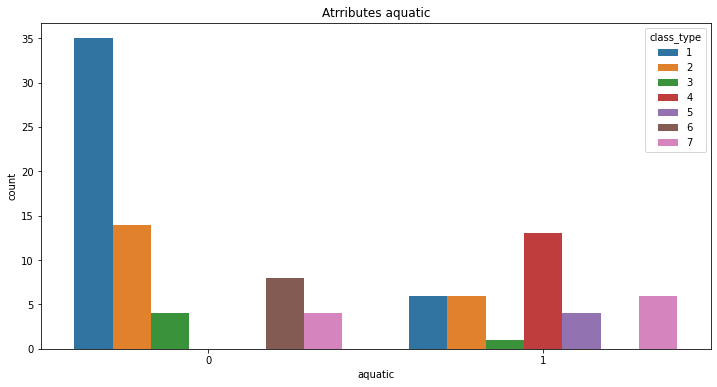

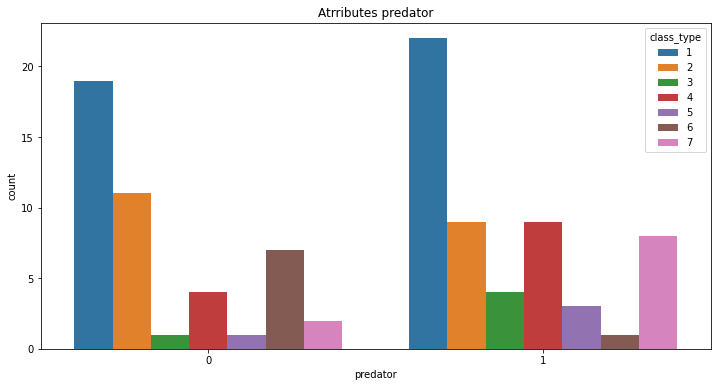

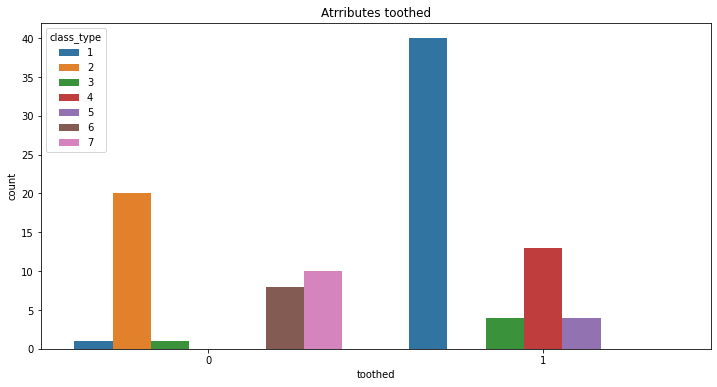

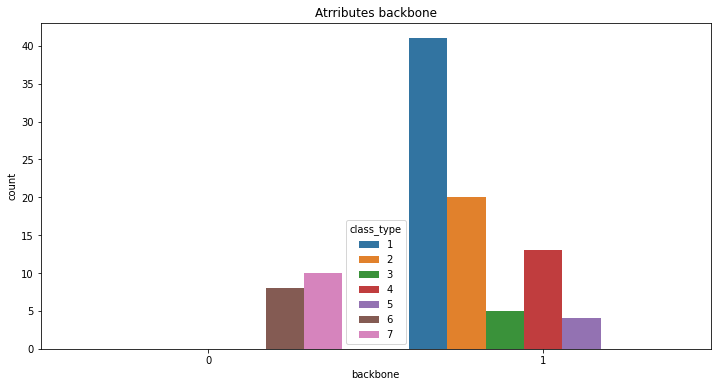

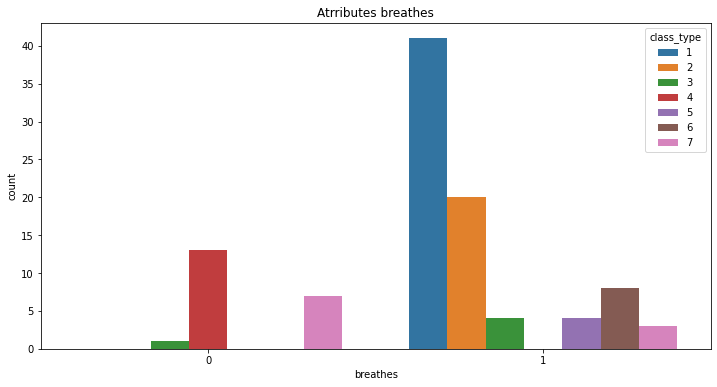

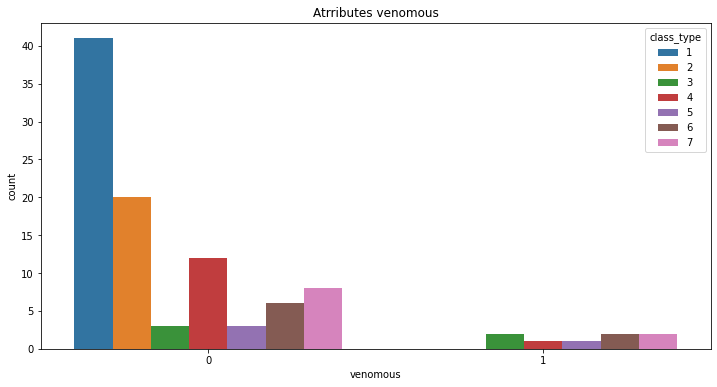

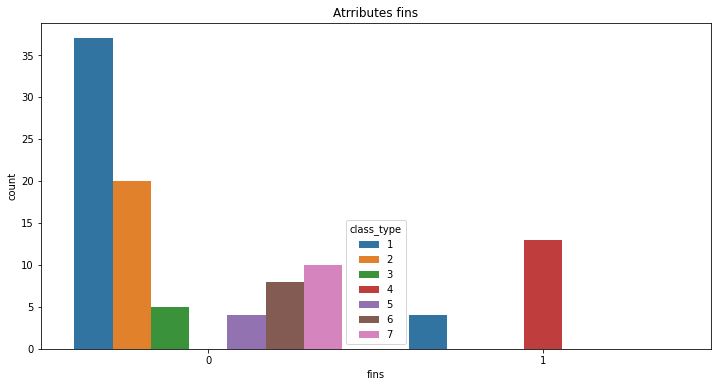

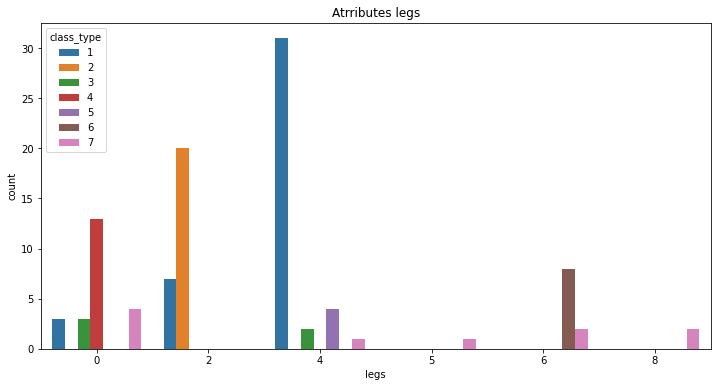

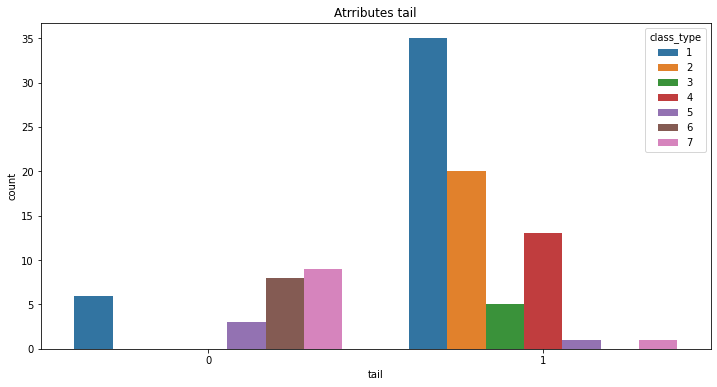

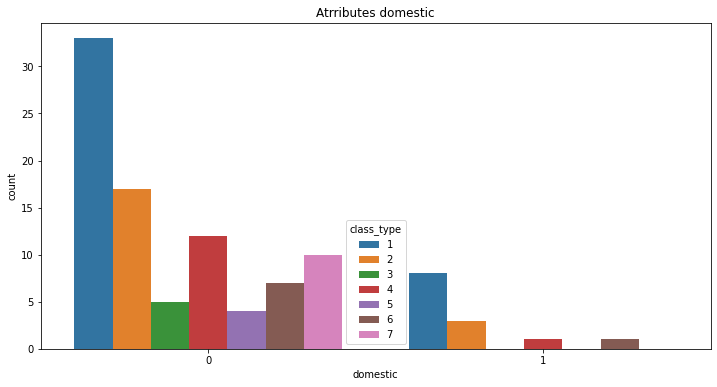

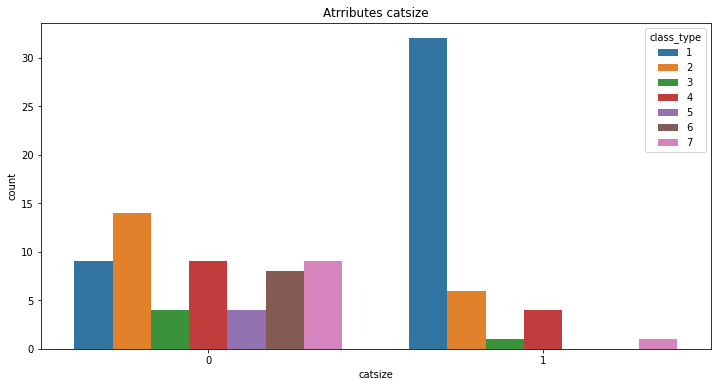

In [ ]:
# Sự tương quan giữa thuộc tính và một số loài nhất định(đặc trưng của một số loài)
for i in df.columns[1:-1]:
  plt.figure(figsize=(12, 6))
  plt.title('Atrributes %s' %i)
  sns.countplot(df[i], hue=df['class_type'])

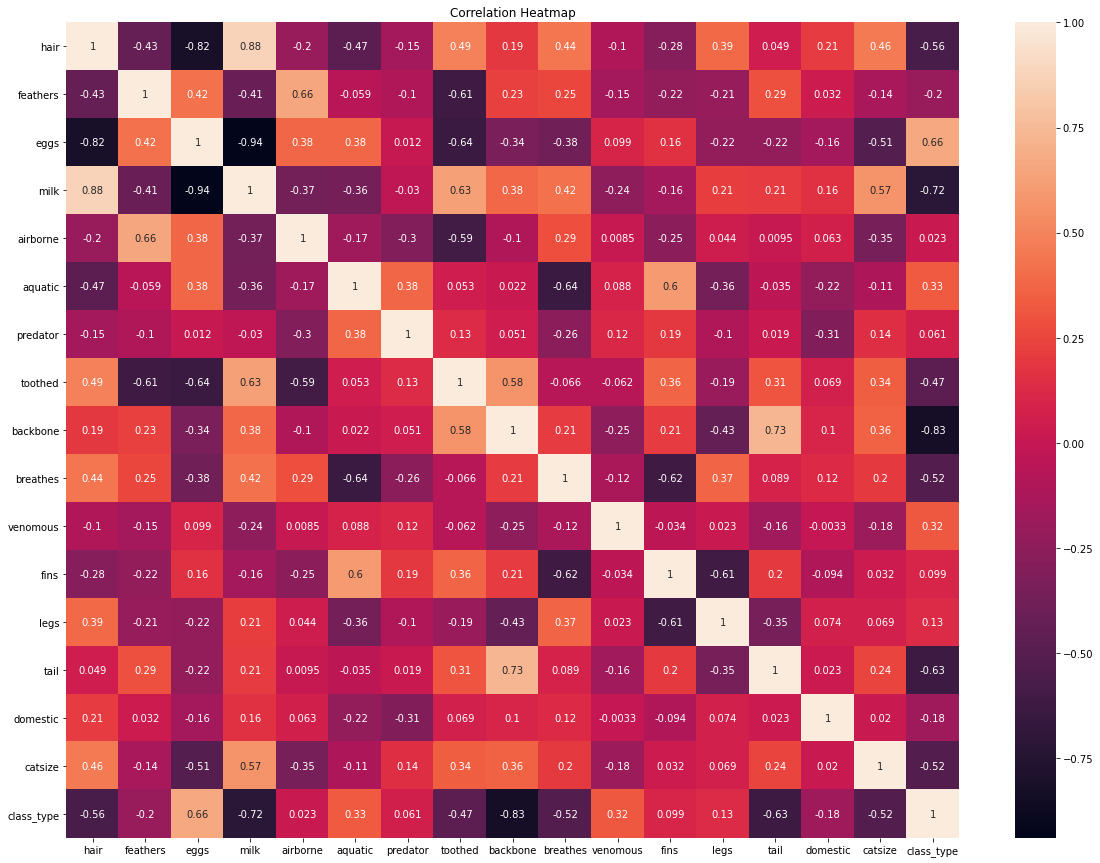

In [ ]:
# Biểu đồ nhiệt thể hiện sự liên quan giữa các thuộc tính
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
X = df.iloc[:, 1:17]
y = df.iloc[:, 17: 18]

In [ ]:
# Chuyển df về matrix
data = X.to_numpy()
# Chuyền về vector hàng
label = y.to_numpy().reshape(-1)

In [ ]:
kernel_name = {
    0: 'linear',
    1: 'polynomial',
    2: 'radial basis',
    3: 'sigmoid'
}

In [ ]:
# Dữ liệu cho việc training
problem = svm_problem(label, data)
for i in range(0, 4):
  print("######---Kernel: %s---#####" %(kernel_name[i]))
  for j in range(0 ,10):
    print('Cost: %i' %(10**j))
    #parameter truyền vào để train model
    parameter = svm_parameter("-s {svm_type} -t {kernel_type} -c {cost} -v 100"
    .format(svm_type=0, kernel_type=i, cost=10**j))
    m = svm_train(problem, parameter)

######---Kernel: linear---#####
Cost: 1
Cross Validation Accuracy = 95.0495%
Cost: 10
Cross Validation Accuracy = 95.0495%
Cost: 100
Cross Validation Accuracy = 96.0396%
Cost: 1000
Cross Validation Accuracy = 95.0495%
Cost: 10000
Cross Validation Accuracy = 95.0495%
Cost: 100000
Cross Validation Accuracy = 95.0495%
Cost: 1000000
Cross Validation Accuracy = 96.0396%
Cost: 10000000
Cross Validation Accuracy = 96.0396%
Cost: 100000000
Cross Validation Accuracy = 96.0396%
Cost: 1000000000
Cross Validation Accuracy = 97.0297%
######---Kernel: polynomial---#####
Cost: 1
Cross Validation Accuracy = 87.1287%
Cost: 10
Cross Validation Accuracy = 93.0693%
Cost: 100
Cross Validation Accuracy = 96.0396%
Cost: 1000
Cross Validation Accuracy = 96.0396%
Cost: 10000
Cross Validation Accuracy = 96.0396%
Cost: 100000
Cross Validation Accuracy = 96.0396%
Cost: 1000000
Cross Validation Accuracy = 96.0396%
Cost: 10000000
Cross Validation Accuracy = 96.0396%
Cost: 100000000
Cross Validation Accuracy = 96.03

In [ ]:
# Training model với kernel linear và c 10
model = svm_train(problem, "-s 0 -t 0 -c 10 -b 1")

In [ ]:
# Lưu model
svm_save_model('libsvm.model', model)
print(model.get_labels())

[1, 4, 2, 7, 6, 5, 3]
